In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
# CSV 파일을 불러옵니다.
data = pd.read_csv("qualification.csv", encoding="cp949")



In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 불러온 라이브러리의 버전을 출력하기
library_versions = {
    "pandas": pd.__version__,
    "scikit-learn": sklearn.__version__,
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__
}

print(library_versions)


{'pandas': '2.0.3', 'scikit-learn': '1.2.2', 'numpy': '1.25.2', 'matplotlib': '3.7.1'}


In [7]:
data.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학,합격여부
0,A,555,Lv4,AL,8,1,1,1,1,3,O,O,X,X,X,X,X,O
1,A,555,Lv5,IM1,7,1,1,1,1,4,O,O,-,-,-,O,X,O
2,A,555,Lv5,IM1,7,2,3,2,2,8,O,O,-,-,-,O,X,O
3,A,444,Lv4,IL,4,1,2,1,1,4,O,O,X,X,O,X,X,O
4,A,444,Lv4,IL,-,-,-,-,-,-,O,O,X,X,O,X,X,O


In [8]:

# 실제값과 예측값을 추출합니다.
x_train = data.iloc[:,0:17]#.values
y_train = data.iloc[:,17]#.values



In [9]:
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
0,A,555,Lv4,AL,8,1,1,1,1,3,O,O,X,X,X,X,X
1,A,555,Lv5,IM1,7,1,1,1,1,4,O,O,-,-,-,O,X
2,A,555,Lv5,IM1,7,2,3,2,2,8,O,O,-,-,-,O,X
3,A,444,Lv4,IL,4,1,2,1,1,4,O,O,X,X,O,X,X
4,A,444,Lv4,IL,-,-,-,-,-,-,O,O,X,X,O,X,X


In [10]:
y_train.head()

0    O
1    O
2    O
3    O
4    O
Name: 합격여부, dtype: object

In [11]:

x_train.replace({'O': 1, 'X': 0}, inplace=True)


<ipython-input-11-45accc4fb1fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.replace({'O': 1, 'X': 0}, inplace=True)


In [12]:
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
0,A,555,Lv4,AL,8,1,1,1,1,3,1,1,0,0,0,0,0
1,A,555,Lv5,IM1,7,1,1,1,1,4,1,1,-,-,-,1,0
2,A,555,Lv5,IM1,7,2,3,2,2,8,1,1,-,-,-,1,0
3,A,444,Lv4,IL,4,1,2,1,1,4,1,1,0,0,1,0,0
4,A,444,Lv4,IL,-,-,-,-,-,-,1,1,0,0,1,0,0


In [13]:
import numpy as np

# 숫자형 데이터만 포함된 새로운 데이터프레임 생성
numeric_df = x_train.select_dtypes(include=[np.number])

In [14]:
x_train = x_train.fillna(1)
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
0,A,555,Lv4,AL,8,1,1,1,1,3,1,1,0,0,0,0,0
1,A,555,Lv5,IM1,7,1,1,1,1,4,1,1,-,-,-,1,0
2,A,555,Lv5,IM1,7,2,3,2,2,8,1,1,-,-,-,1,0
3,A,444,Lv4,IL,4,1,2,1,1,4,1,1,0,0,1,0,0
4,A,444,Lv4,IL,-,-,-,-,-,-,1,1,0,0,1,0,0


In [15]:
df = pd.DataFrame(data)

# '-'를 0으로 대체하고 문자열을 숫자로 변환하는 함수
def convert_to_new_score(toeic_score):
    if toeic_score == '-':
        return 0
    else:
        return float(toeic_score) / 990.0

# '토익' 열에 있는 각 토익 점수를 새로운 점수로 변환
df['토익'] = df['토익'].apply(convert_to_new_score)

# 변환된 데이터프레임 출력
print(df)
# x_train이 df와 같은 데이터프레임을 참조하도록 설정
x_train = df

# 변환된 데이터프레임의 내용 확인
print(x_train.head())



    학점        토익 토익스피킹   오픽 외국어 자격증 해외경험 인턴 수상내역 교내/봉사 고졸 초대졸 지방4년제 수도권4년제  \
0    A  0.560606   Lv4   AL   8   1    1  1    1     3  1   1     0      0   
1    A  0.560606   Lv5  IM1   7   1    1  1    1     4  1   1     -      -   
2    A  0.560606   Lv5  IM1   7   2    3  2    2     8  1   1     -      -   
3    A  0.448485   Lv4   IL   4   1    2  1    1     4  1   1     0      0   
4    A  0.448485   Lv4   IL   -   -    -  -    -     -  1   1     0      0   
..  ..       ...   ...  ...  ..  ..  ... ..  ...   ... ..  ..   ...    ...   
155  B  0.000000     -    -   -   4    -  -    -     -  1   1     0      0   
156  C  0.000000     -    -   -   3    -  1    -     -  1   1     1      0   
157  B  0.000000     -    -   -   3    -  -    -     -  1   1     0      0   
158  C  0.000000     -   AL   -   -    -  -    -     -  1   1     1      0   
159  B  0.000000     -    -   -   2    -  -    -     -  1   1     0      0   

    서울4년제 대학원 해외대학 합격여부  
0       0   0    0    O  
1       -  

In [16]:
x_train.replace({'AL': 5, 'IH': 4, 'IM2': 3, 'IM1': 2, 'IL': 1 }, inplace=True) #오픽

In [17]:
x_train.replace({'Lv7': 4,'Lv6': 3,'Lv5': 2,'Lv4': 1}, inplace=True) #토익스피킹

x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학,합격여부
0,A,0.560606,1,5,8,1,1,1,1,3,1,1,0,0,0,0,0,O
1,A,0.560606,2,2,7,1,1,1,1,4,1,1,-,-,-,1,0,O
2,A,0.560606,2,2,7,2,3,2,2,8,1,1,-,-,-,1,0,O
3,A,0.448485,1,1,4,1,2,1,1,4,1,1,0,0,1,0,0,O
4,A,0.448485,1,1,-,-,-,-,-,-,1,1,0,0,1,0,0,O


In [18]:
x_train.replace({'A': 30, 'B': 25, 'C': 15, 'D': 5}, inplace=True) # A = 4.0~4.5, B = 3.5~4.0, C = 3.0~3.5, D = 3.0미만

In [19]:
x_train.replace({'-': 0}, inplace=True)
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학,합격여부
0,30,0.560606,1,5,8,1,1,1,1,3,1,1,0,0,0,0,0,O
1,30,0.560606,2,2,7,1,1,1,1,4,1,1,0,0,0,1,0,O
2,30,0.560606,2,2,7,2,3,2,2,8,1,1,0,0,0,1,0,O
3,30,0.448485,1,1,4,1,2,1,1,4,1,1,0,0,1,0,0,O
4,30,0.448485,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,O


In [20]:
x_train['자격증'] = x_train['자격증'].astype(float)
x_train['외국어'] = x_train['외국어'].astype(float)
x_train['해외경험'] = x_train['해외경험'].astype(float)
x_train['인턴'] = x_train['인턴'].astype(float)
x_train['수상내역'] = x_train['수상내역'].astype(float)
x_train['교내/봉사'] = x_train['교내/봉사'].astype(float)
x_train['토익'] = x_train['토익'].astype(float)

In [21]:
y_train.replace({'O': 1, 'X': 0}, inplace=True)


y_train.fillna(1, inplace=True)
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: 합격여부, dtype: int64

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학점      160 non-null    int64  
 1   토익      160 non-null    float64
 2   토익스피킹   160 non-null    int64  
 3   오픽      160 non-null    int64  
 4   외국어     160 non-null    float64
 5   자격증     160 non-null    float64
 6   해외경험    160 non-null    float64
 7   인턴      160 non-null    float64
 8   수상내역    160 non-null    float64
 9   교내/봉사   160 non-null    float64
 10  고졸      160 non-null    int64  
 11  초대졸     160 non-null    int64  
 12  지방4년제   160 non-null    int64  
 13  수도권4년제  160 non-null    int64  
 14  서울4년제   160 non-null    int64  
 15  대학원     160 non-null    int64  
 16  해외대학    160 non-null    int64  
 17  합격여부    160 non-null    object 
dtypes: float64(7), int64(10), object(1)
memory usage: 22.6+ KB


In [23]:
x_train = x_train.drop(['합격여부'], axis=1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학점      160 non-null    int64  
 1   토익      160 non-null    float64
 2   토익스피킹   160 non-null    int64  
 3   오픽      160 non-null    int64  
 4   외국어     160 non-null    float64
 5   자격증     160 non-null    float64
 6   해외경험    160 non-null    float64
 7   인턴      160 non-null    float64
 8   수상내역    160 non-null    float64
 9   교내/봉사   160 non-null    float64
 10  고졸      160 non-null    int64  
 11  초대졸     160 non-null    int64  
 12  지방4년제   160 non-null    int64  
 13  수도권4년제  160 non-null    int64  
 14  서울4년제   160 non-null    int64  
 15  대학원     160 non-null    int64  
 16  해외대학    160 non-null    int64  
dtypes: float64(7), int64(10)
memory usage: 21.4 KB


In [24]:
def min_max_normalize(column):
  return(column - column.min())/(column.max() - column.min())

x_train = x_train.apply(min_max_normalize)
df.fillna(1.0, inplace=True)
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
0,1.0,0.572165,0.25,1.0,1.000,0.125,0.333333,0.2,0.25,0.06,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.572165,0.50,0.4,0.875,0.125,0.333333,0.2,0.25,0.08,NaN,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.572165,0.50,0.4,0.875,0.250,1.000000,0.4,0.50,0.16,NaN,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.457732,0.25,0.2,0.500,0.125,0.666667,0.2,0.25,0.08,NaN,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.457732,0.25,0.2,0.000,0.000,0.000000,0.0,0.00,0.00,NaN,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:

# NaN을 1.0으로 변환
x_train.fillna(1.0, inplace=True)

In [26]:
x_train.head()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
0,1.0,0.572165,0.25,1.0,1.000,0.125,0.333333,0.2,0.25,0.06,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.572165,0.50,0.4,0.875,0.125,0.333333,0.2,0.25,0.08,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.572165,0.50,0.4,0.875,0.250,1.000000,0.4,0.50,0.16,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.457732,0.25,0.2,0.500,0.125,0.666667,0.2,0.25,0.08,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.457732,0.25,0.2,0.000,0.000,0.000000,0.0,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
import numpy as np

# 숫자형 데이터만 포함된 새로운 데이터프레임 생성
numeric_df = x_train.select_dtypes(include=[np.number])


In [28]:
x_train.describe()

,학점,토익,토익스피킹,오픽,외국어,자격증,해외경험,인턴,수상내역,교내/봉사,고졸,초대졸,지방4년제,수도권4년제,서울4년제,대학원,해외대학
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.71000,0.191076,0.101562,0.083750,0.055469,0.199219,0.104167,0.096250,0.095312,0.024250,1.0,0.981250,0.243750,0.125000,0.243750,0.156250,0.018750
std,0.29315,0.336829,0.249680,0.233617,0.184793,0.204748,0.218589,0.210387,0.198009,0.091868,0.0,0.136067,0.430692,0.331757,0.430692,0.364232,0.136067
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.80000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,0.443041,0.000000,0.000000,0.000000,0.375000,0.000000,0.050000,0.000000,0.020000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
print(y_train.unique())


[1 0]


In [30]:
correlations = x_train.corrwith(y_train)

In [31]:
correlations

학점       -0.119706
토익        0.172315
토익스피킹    -0.231805
오픽       -0.194022
외국어       0.091919
자격증      -0.380089
해외경험      0.185808
인턴       -0.051076
수상내역      0.000147
교내/봉사    -0.240659
고졸             NaN
초대졸      -0.053730
지방4년제    -0.253541
수도권4년제    0.146911
서울4년제     0.177559
대학원       0.116289
해외대학      0.053730
dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

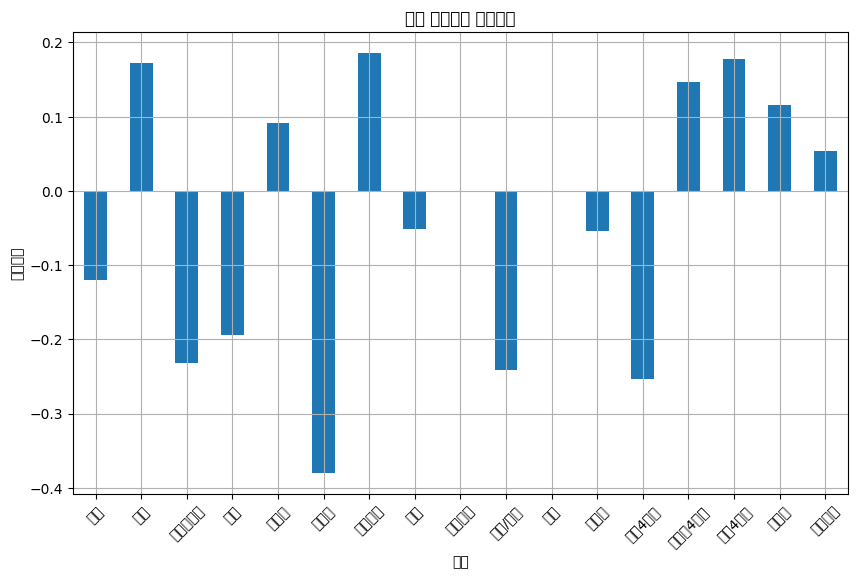

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우

# 상관관계 계산
correlations = x_train.corrwith(y_train)

# 그래프 그리기
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('타겟 변수와의 상관관계')
plt.xlabel('특징')
plt.ylabel('상관계수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 160 entries, 0 to 159
Series name: 합격여부
Non-Null Count  Dtype
--------------  -----
160 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
predictions=random_forest.predict(X_val)

In [ ]:
print(predictions)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [ ]:
print(Y_val)

105    1
108    1
141    0
55     1
94     1
29     1
101    1
51     1
100    1
142    0
19     1
84     1
15     1
66     1
24     1
30     1
128    1
147    0
98     1
16     1
75     1
18     1
12     1
9      1
31     1
151    0
97     1
56     1
131    1
104    1
136    1
78     1
Name: 합격여부, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Confusion Matrix를 계산합니다.
cm = confusion_matrix(Y_val, predictions)
print("Confusion Matrix:")
print(cm)

# F1-score를 계산합니다.
f1 = f1_score(Y_val, predictions)
print("F1-score:", f1)

# Accuracy를 계산합니다.
accuracy = accuracy_score(Y_val, predictions)
print("Accuracy:", accuracy)

# Precision을 계산합니다.
precision = precision_score(Y_val, predictions)
print("Precision:", precision)

# Recall을 계산합니다.
recall = recall_score(Y_val, predictions)
print("Recall:", recall)


Confusion Matrix:
[[ 2  2]
 [ 0 28]]
F1-score: 0.9655172413793104
Accuracy: 0.9375
Precision: 0.9333333333333333
Recall: 1.0


Confusion Matrix:
[[ 2  2]
 [ 0 28]]
F1-score: 0.9655172413793104
Accuracy: 0.9375
Precision: 0.9333333333333333
Recall: 1.0

Model Evaluation Metrics:
      Metric     Value
0   Accuracy  0.937500
1  Precision  0.933333
2     Recall  1.000000
3   F1 Score  0.965517


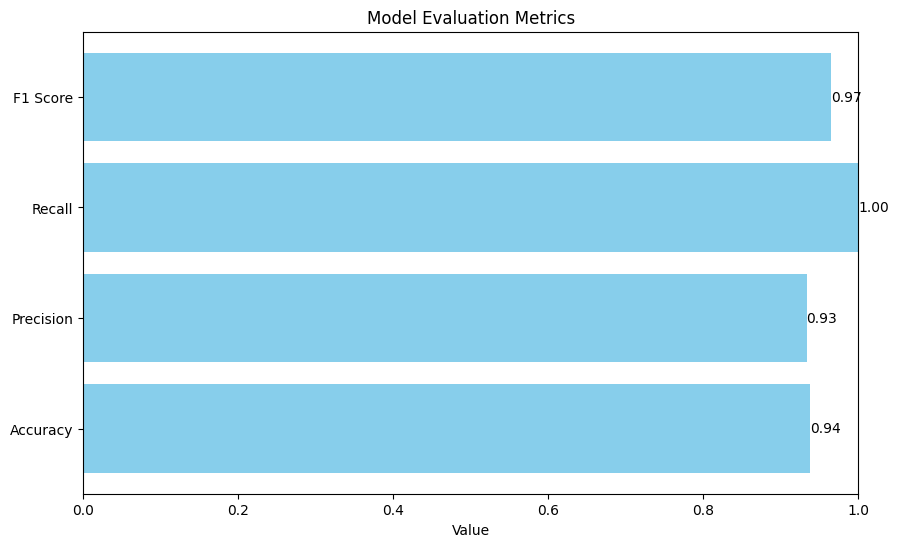

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# 실제 값과 예측 값을 사용하여 Confusion Matrix를 계산합니다.
cm = confusion_matrix(Y_val, predictions)
print("Confusion Matrix:")
print(cm)

# F1-score를 계산합니다.
f1 = f1_score(Y_val, predictions)
print("F1-score:", f1)

# Accuracy를 계산합니다.
accuracy = accuracy_score(Y_val, predictions)
print("Accuracy:", accuracy)

# Precision을 계산합니다.
precision = precision_score(Y_val, predictions)
print("Precision:", precision)

# Recall을 계산합니다.
recall = recall_score(Y_val, predictions)
print("Recall:", recall)

# 평가 지표를 데이터프레임으로 저장합니다.
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
}

df_metrics = pd.DataFrame(metrics)

# 평가 지표를 표로 출력합니다.
print("\nModel Evaluation Metrics:")
print(df_metrics)

# 평가 지표를 막대 그래프로 시각화합니다.
plt.figure(figsize=(10, 6))
plt.barh(df_metrics['Metric'], df_metrics['Value'], color='skyblue')
plt.xlabel('Value')
plt.title('Model Evaluation Metrics')
plt.xlim(0, 1)
for index, value in enumerate(df_metrics['Value']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()
